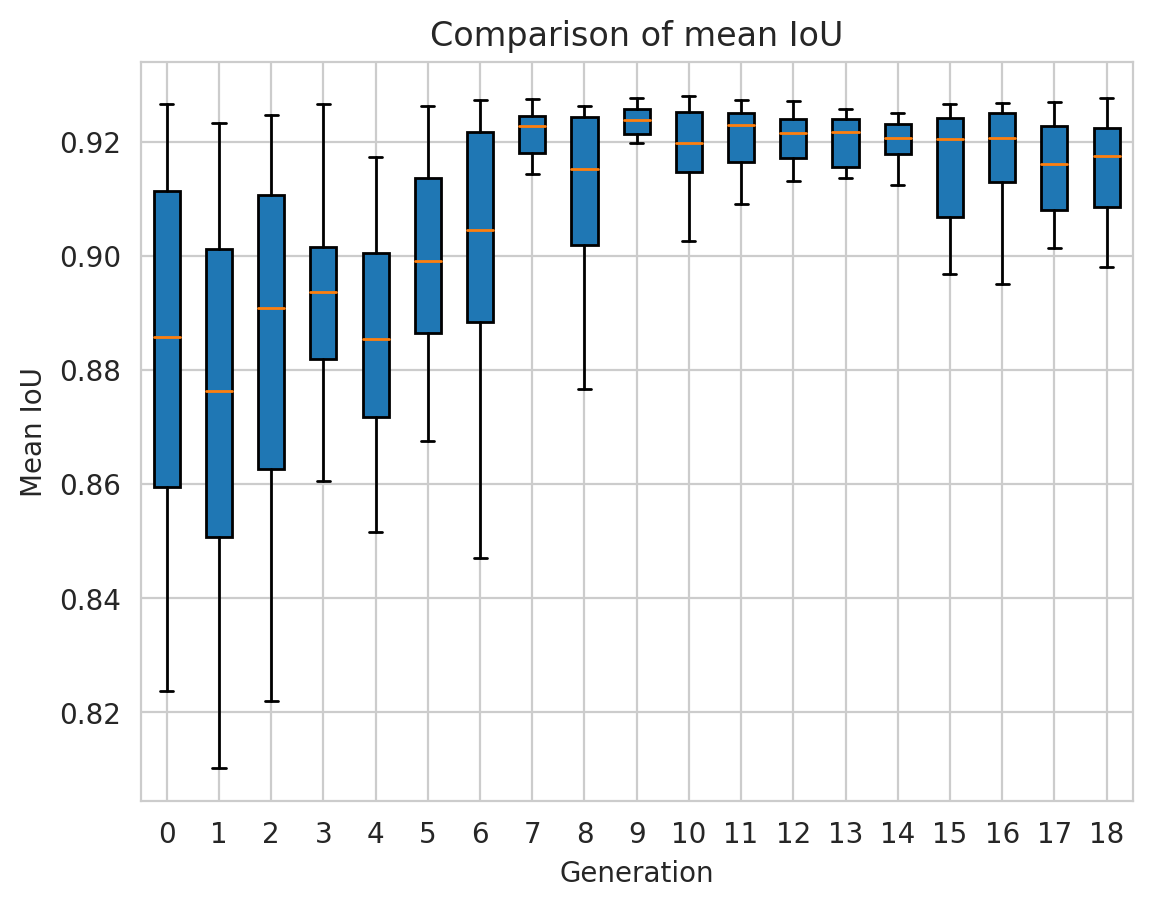

In [5]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({"figure.dpi": 200})

speed = []
for i in range(6):
    with open(f'results_24042023215229/generation_{i}/iou_list.pkl', 'rb') as f:
        a = pickle.load(f)
    f.close()
    speed.append(a)

for i in range(8):
    with open(f'results_25042023190939/generation_{i}/iou_list.pkl', 'rb') as f:
        b = pickle.load(f)
    f.close()
    speed.append(b)

for i in range(5):
    with open(f'results_26042023091803/generation_{i}/iou_list.pkl', 'rb') as f:
        c = pickle.load(f)
    f.close()
    speed.append(c)


for i in range(len(speed)):
    speed[i] = [j for j in speed[i] if j != 0]

sns.set_style('whitegrid')

fig, ax = plt.subplots()

bp = ax.boxplot(speed, showfliers=False, patch_artist=True)

label = []
for i in range(len(speed)):
    t = f'{i}'
    label.append(t)
ax.set_xticklabels(label)
ax.set_ylabel('Mean IoU')
ax.set_xlabel('Generation')
ax.tick_params(axis='both')
ax.set_title('Comparison of mean IoU')
plt.show()

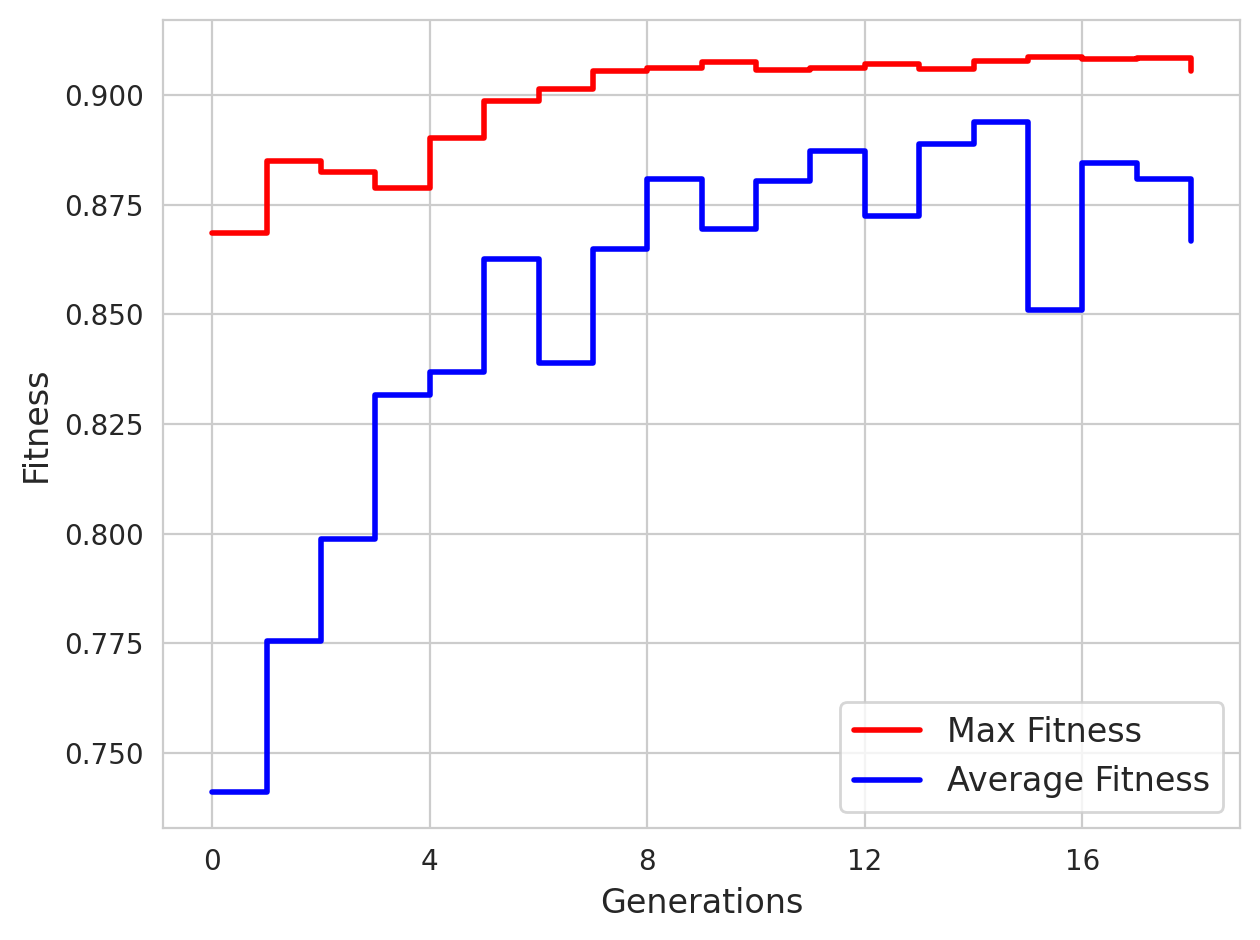

In [14]:
import matplotlib.ticker as ticker

with open(f'results_24042023215229/max_fitness_history.pkl', 'rb') as f:
    a = pickle.load(f)
    f.close()

with open(f'results_25042023190939/max_fitness_history.pkl', 'rb') as f:
    b = pickle.load(f)
    f.close()
with open(f'results_26042023091803/max_fitness_history.pkl', 'rb') as f:
    c = pickle.load(f)
    f.close()

max_fitness_history = a + b + c

with open(f'results_24042023215229/average_fitness_history.pkl', 'rb') as f:
    d = pickle.load(f)
    f.close()

with open(f'results_25042023190939/average_fitness_history.pkl', 'rb') as f:
    e = pickle.load(f)
    f.close()
with open(f'results_26042023091803/average_fitness_history.pkl', 'rb') as f:
    g = pickle.load(f)
    f.close()

average_fitness_history = d + e + g

generations = range(19)

fig, ax = plt.subplots()

ax.step(generations, max_fitness_history, label='Max Fitness', where='post', color='red', linewidth=2)
ax.step(generations, average_fitness_history, label='Average Fitness', where='post', color='blue', linewidth=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))


ax.set_xlabel('Generations', fontsize=12)
ax.set_ylabel('Fitness', fontsize=12)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()